In [10]:

import warnings
warnings.filterwarnings("ignore")
 
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

Fight_dict={'Gray':[75.9, 76.1, 77.0, 77.7, 77.5, 77.7, 77.6, 77.9, 78.6, 79.3, 78.8, 78.6, 79.3, 78.6],'Canny':[78.1, 79.5, 79.9, 80.1, 79.5, 78.7, 78.6, 78.9, 79.1, 78.7, 78.4, 78.1, 77.3, 77.2],'Laplacian':[71.7, 74.5, 76.2, 75.3, 75.3, 75.6, 74.8, 74.5, 73.9, 73.7, 75.0, 76.3, 75.3, 76.5],
           'Harris':[66.2, 68.1, 66.3, 65.9, 65.9, 66.0, 67.7, 67.4, 68.5, 69.5, 69.6, 68.3, 69.3, 71.3],'Optical_Mag':[70.8, 72.6, 72.7, 73.0, 72.8, 74.0, 74.4, 74.1, 74.3, 75.0, 75.2, 75.0, 74.3, 74.2],
           'Optical_Ang':[60.0, 62.5, 63.3, 65.7, 67.0, 67.4, 67.3, 67.2, 67.0, 67.3, 67.8, 69.8, 69.9, 69.7]}

Fire_dict={'Gray':[76.7, 76.9, 77.5, 79.1, 78.8, 78.6, 80.2, 80.6, 80.7, 80.3, 80.1, 80.4, 81.0, 81.2],'Canny':[70.2, 69.9, 69.6, 71.4, 72.3, 73.0, 73.6, 72.5, 72.2, 72.9, 73.4, 73.1, 74.3, 74.8],'Laplacian':[77.8, 78.6, 78.5, 79.4, 79.3, 79.1, 80.9, 81.0, 81.3, 81.4, 81.7, 81.4, 81.5, 81.3],
           'Harris':[66.2, 68.1, 68.3, 67.5, 67.9, 67.2, 67.5, 67.6, 67.3, 67.5, 68.3, 67.8, 67.3, 67.4],'Optical_Mag':[70.8, 72.6, 72.7, 73.0, 72.8, 74.0, 74.4, 74.1, 74.3, 75.0, 75.2, 75.0, 74.3, 74.2],
           'Optical_Ang':[60.0, 62.5, 63.3, 65.7, 67.0, 67.4, 67.3, 67.2, 67.0, 67.3, 67.8, 69.8, 69.9, 69.7]}

Theft_dict={'Gray':[72.6, 75.7, 77.4, 76.2, 76.1, 77.8, 78.5, 78.9, 78.9, 78.5, 78.7, 79.1, 79.4, 79.1],'Canny':[75.9, 75.7, 78.9, 78.5, 78.7, 78.5, 78.1, 78.1, 79.4, 79.5, 79.8, 80.9, 80.6, 80.1],'Laplacian':[66.8, 73.5, 76.9, 74.0, 74.1, 75.9, 76.5, 77.7, 79.1, 77.9, 77.6, 77.3, 77.3, 76.9],
           'Harris':[58.3, 58.0, 58.8, 59.4, 59.3, 59.2, 64.2, 71.0, 72.0, 72.5, 71.5, 72.2, 72.0, 74.0],'Optical_Mag':[70.8, 72.6, 72.7, 73.0, 72.8, 74.0, 74.4, 74.1, 74.3, 75.0, 75.2, 75.0, 74.3, 74.2],
           'Optical_Ang':[60.0, 62.5, 63.3, 65.7, 67.0, 67.4, 67.3, 67.2, 67.0, 67.3, 67.8, 69.8, 69.9, 69.7]}

Road_dict={'Gray':[73.2, 75.8, 76.2, 77.9, 77.9, 78.7, 78.0, 78.2, 77.2, 77.2, 77.3, 76.6, 75.9, 75.1],'Canny':[71.4, 71.3, 70.4, 71.9, 73.1, 75.8, 75.9, 76.2, 76.2, 75.3, 74.5, 74.2, 74.1, 73.9],'Laplacian':[68.6, 72.2, 73.9, 74.4, 74.3, 75.2, 74.6, 74.9, 74.7, 75.0, 74.9, 74.8, 74.1, 73.3],
           'Harris':[65.6, 65.6, 66.7, 66.6, 67.8, 67.8, 67.7, 68.3, 68.6, 68.6, 67.8, 67.5, 67.4, 67.4],'Optical_Mag':[70.8, 72.6, 72.7, 73.0, 72.8, 74.0, 74.4, 74.1, 74.3, 75.0, 75.2, 75.0, 74.3, 74.2],
           'Optical_Ang':[60.0, 62.5, 63.3, 65.7, 67.0, 67.4, 67.3, 67.2, 67.0, 67.3, 67.8, 69.8, 69.9, 69.7]}

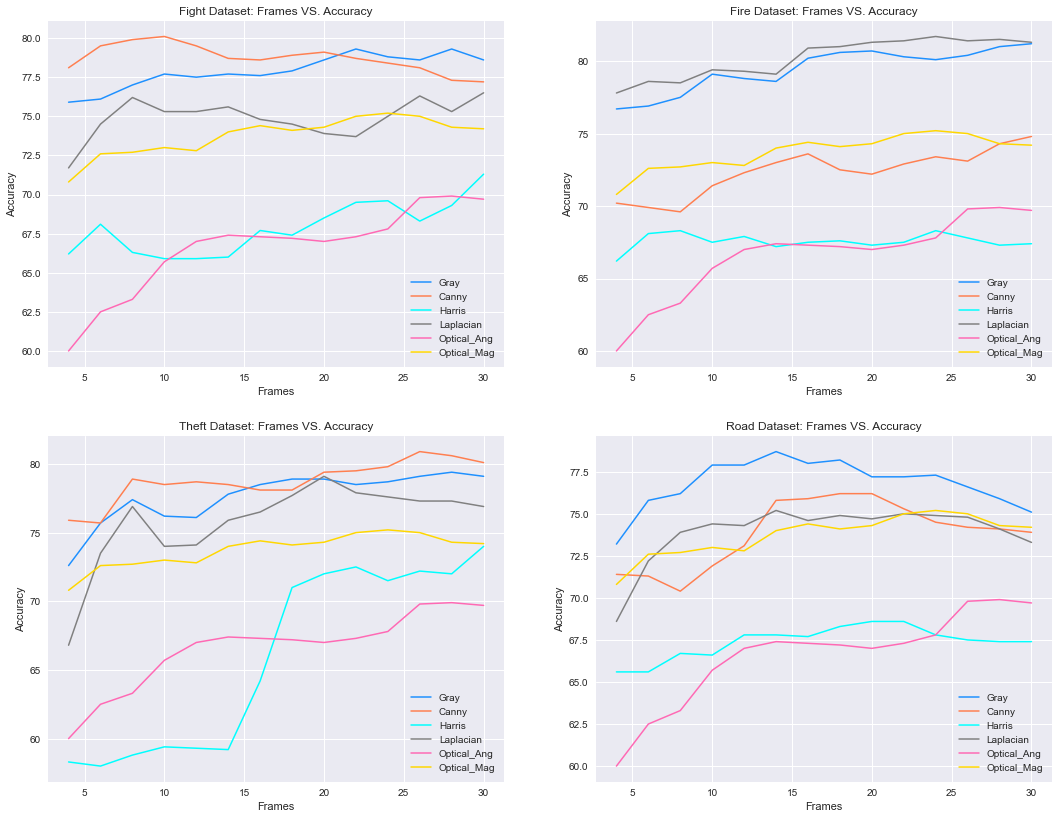

In [11]:


# 画出损失函数曲线
plt.figure(figsize=(18, 14))
plt.subplot(221)
x_values=list(np.arange(4,32,2))
plt.plot(x_values,Fight_dict['Gray'], c='dodgerblue', lw=1.5)
plt.plot(x_values,Fight_dict['Canny'], c='coral', lw=1.5)
plt.plot(x_values,Fight_dict['Harris'], c='aqua', lw=1.5)
plt.plot(x_values,Fight_dict['Laplacian'], c='gray', lw=1.5)

plt.plot(x_values,Fight_dict['Optical_Ang'], c='hotpink', lw=1.5)
plt.plot(x_values,Fight_dict['Optical_Mag'], c='gold', lw=1.5)
plt.title('Fight Dataset: Frames VS. Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('Frames')
plt.legend(['Gray', 'Canny','Harris','Laplacian','Optical_Ang','Optical_Mag'])

plt.subplot(222)
plt.plot(x_values,Fire_dict['Gray'], c='dodgerblue', lw=1.5)
plt.plot(x_values,Fire_dict['Canny'], c='coral', lw=1.5)
plt.plot(x_values,Fire_dict['Harris'], c='aqua', lw=1.5)
plt.plot(x_values,Fire_dict['Laplacian'], c='gray', lw=1.5)
plt.plot(x_values,Fire_dict['Optical_Ang'], c='hotpink', lw=1.5)
plt.plot(x_values,Fire_dict['Optical_Mag'], c='gold', lw=1.5)
plt.title('Fire Dataset: Frames VS. Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('Frames')
plt.legend(['Gray', 'Canny','Harris','Laplacian','Optical_Ang','Optical_Mag'])


plt.subplot(223)
plt.plot(x_values,Theft_dict['Gray'], c='dodgerblue', lw=1.5)
plt.plot(x_values,Theft_dict['Canny'], c='coral', lw=1.5)
plt.plot(x_values,Theft_dict['Harris'], c='aqua', lw=1.5)
plt.plot(x_values,Theft_dict['Laplacian'], c='gray', lw=1.5)
plt.plot(x_values,Theft_dict['Optical_Ang'], c='hotpink', lw=1.5)
plt.plot(x_values,Theft_dict['Optical_Mag'], c='gold', lw=1.5)
plt.title('Theft Dataset: Frames VS. Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('Frames')
plt.legend(['Gray', 'Canny','Harris','Laplacian','Optical_Ang','Optical_Mag'])


plt.subplot(224)
plt.plot(x_values,Road_dict['Gray'], c='dodgerblue', lw=1.5)
plt.plot(x_values,Road_dict['Canny'], c='coral', lw=1.5)
plt.plot(x_values,Road_dict['Harris'], c='aqua', lw=1.5)
plt.plot(x_values,Road_dict['Laplacian'], c='gray', lw=1.5)
plt.plot(x_values,Road_dict['Optical_Ang'], c='hotpink', lw=1.5)
plt.plot(x_values,Road_dict['Optical_Mag'], c='gold', lw=1.5)
plt.title('Road Dataset: Frames VS. Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('Frames')
plt.legend(['Gray', 'Canny','Harris','Laplacian','Optical_Ang','Optical_Mag'])

